# El Hacedor

In [ ]:
import pandas as pd
import numpy as np
import re

#nombres = pd.read_csv('historico-nombres.csv').iloc[0:200000]
#regex = "[^a-z]"
#nombres = nombres['nombre'].str.lower()
#filtro = nombres.str.contains("[^a-z]")
#nombres = nombres[~filtro].astype('str')

#nombres.to_csv(r'nombres.txt', header=None, index=None, mode='a')
#nombres.head(10)

In [ ]:
palabras = open('nombres.txt', 'r').read().splitlines()

In [ ]:
palabras[:10]

['maria',
 'rosa',
 'jose',
 'carmen',
 'ana',
 'juana',
 'antonio',
 'elena',
 'teresa',
 'angela']

In [ ]:
len(palabras)

21029

### Bigramas

In [ ]:
b = {}

for p in palabras[:3]:
  cs = ['<I>'] + list(p) + ['<F>']
  for c1, c2 in zip(cs, cs[1:]):
    bigrama = (c1, c2)
    b[bigrama] = b.get(bigrama, 0) + 1
    print(c1, c2)

<I> m
m a
a r
r i
i a
a <F>
<I> r
r o
o s
s a
a <F>
<I> j
j o
o s
s e
e <F>


In [ ]:
b

{('<I>', 'm'): 1,
 ('m', 'a'): 1,
 ('a', 'r'): 1,
 ('r', 'i'): 1,
 ('i', 'a'): 1,
 ('a', '<F>'): 2,
 ('<I>', 'r'): 1,
 ('r', 'o'): 1,
 ('o', 's'): 2,
 ('s', 'a'): 1,
 ('<I>', 'j'): 1,
 ('j', 'o'): 1,
 ('s', 'e'): 1,
 ('e', '<F>'): 1}

In [ ]:
b = {}

for p in palabras:
  cs = ['<I>'] + list(p) + ['<F>']
  for c1, c2 in zip(cs, cs[1:]):
    bigrama = (c1, c2)
    b[bigrama] = b.get(bigrama, 0) + 1

In [ ]:
sorted(b.items(), key = lambda kv: -kv[1])

[(('a', '<F>'), 10750),
 (('o', '<F>'), 5515),
 (('i', 'n'), 3768),
 (('n', 'a'), 3525),
 (('i', 'a'), 3419),
 (('l', 'i'), 3390),
 (('e', 'l'), 3231),
 (('a', 'n'), 2893),
 (('<I>', 'a'), 2611),
 (('e', 'r'), 2359),
 (('r', 'i'), 2335),
 (('<I>', 'e'), 2205),
 (('a', 'r'), 2031),
 (('i', 'o'), 2022),
 (('d', 'a'), 2017),
 (('a', 'l'), 1787),
 (('c', 'i'), 1783),
 (('l', 'a'), 1750),
 (('i', 'l'), 1710),
 (('r', 'a'), 1676),
 (('e', 'n'), 1650),
 (('m', 'a'), 1553),
 (('o', 'r'), 1527),
 (('d', 'o'), 1505),
 (('t', 'a'), 1478),
 (('n', 'o'), 1472),
 (('<I>', 'c'), 1465),
 (('n', 'i'), 1448),
 (('o', 'n'), 1349),
 (('m', 'i'), 1265),
 (('d', 'e'), 1256),
 (('<I>', 's'), 1248),
 (('<I>', 'l'), 1230),
 (('<I>', 'm'), 1228),
 (('r', 'o'), 1204),
 (('n', 'd'), 1160),
 (('e', 's'), 1127),
 (('l', 'e'), 1123),
 (('s', 'a'), 1086),
 (('i', 's'), 1073),
 (('d', 'i'), 1054),
 (('s', 'i'), 1049),
 (('<I>', 'd'), 1038),
 (('t', 'o'), 1032),
 (('<I>', 'r'), 1014),
 (('r', 'e'), 1014),
 (('i', 'd'),

In [ ]:
import torch

In [ ]:
N = torch.zeros((27, 27), dtype=torch.int32)

In [ ]:
caracs = sorted(list(set(''.join(palabras))))

paf = {p:f+1 for f,p in enumerate(caracs)}
paf['.'] = 0
fap = {f:p for p,f in paf.items()}
paf

{'a': 1,
 'b': 2,
 'c': 3,
 'd': 4,
 'e': 5,
 'f': 6,
 'g': 7,
 'h': 8,
 'i': 9,
 'j': 10,
 'k': 11,
 'l': 12,
 'm': 13,
 'n': 14,
 'o': 15,
 'p': 16,
 'q': 17,
 'r': 18,
 's': 19,
 't': 20,
 'u': 21,
 'v': 22,
 'w': 23,
 'x': 24,
 'y': 25,
 'z': 26,
 '.': 0}

In [ ]:
fap

{1: 'a',
 2: 'b',
 3: 'c',
 4: 'd',
 5: 'e',
 6: 'f',
 7: 'g',
 8: 'h',
 9: 'i',
 10: 'j',
 11: 'k',
 12: 'l',
 13: 'm',
 14: 'n',
 15: 'o',
 16: 'p',
 17: 'q',
 18: 'r',
 19: 's',
 20: 't',
 21: 'u',
 22: 'v',
 23: 'w',
 24: 'x',
 25: 'y',
 26: 'z',
 0: '.'}

In [ ]:
for p in palabras:
  cs = ['.'] + list(p) + ['.']
  for c1, c2 in zip(cs, cs[1:]):
    ix1 = paf[c1]
    ix2 = paf[c2]
    N[ix1, ix2] += 1

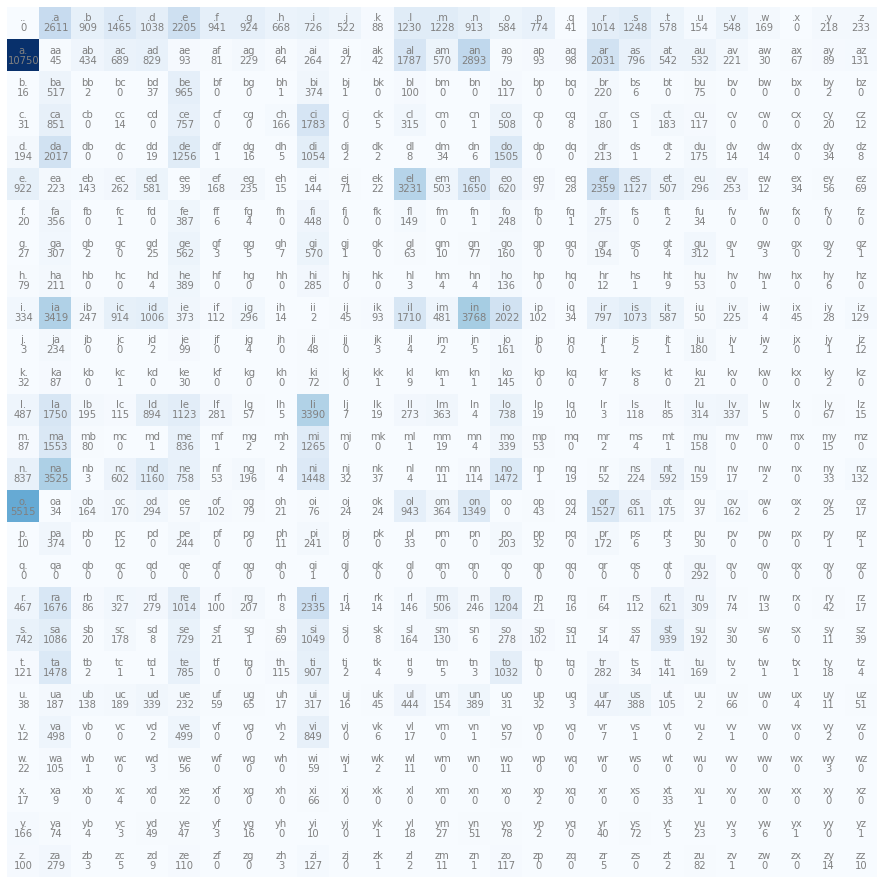

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(16, 16))
plt.imshow(N, cmap='Blues')
for i in range(27):
  for j in range(27):
    cts = fap[i] + fap[j]
    plt.text(j, i, cts, ha='center', va='bottom', color='gray')
    plt.text(j, i, N[i, j].item(), ha='center', va='top', color='gray')
plt.axis('off');

Hemos contado la ocurrencia de cada bigrama en el documento de nombres. Ahora, podemos utilizar este conteo como una distribución de probabilidades acerca de cuál letra debe ser consecutiva con otra. Ejemplifiquemos con una fila:

In [ ]:
N[0] # first row

tensor([   0, 2611,  909, 1465, 1038, 2205,  941,  924,  668,  726,  522,   88,
        1230, 1228,  913,  584,  774,   41, 1014, 1248,  578,  154,  548,  169,
           0,  218,  233], dtype=torch.int32)

Obtendremos las probabilidades de cada valor al dividir cada uno por la sumatoria de todos. Con este truco, todos los valores sumados nos darán 1:

In [ ]:
p = N[0].float()
p = p / p.sum()
p

tensor([0.0000, 0.1242, 0.0432, 0.0697, 0.0494, 0.1049, 0.0447, 0.0439, 0.0318,
        0.0345, 0.0248, 0.0042, 0.0585, 0.0584, 0.0434, 0.0278, 0.0368, 0.0019,
        0.0482, 0.0593, 0.0275, 0.0073, 0.0261, 0.0080, 0.0000, 0.0104, 0.0111])

In [ ]:
p.sum()

tensor(1.0000)

Utilizaremos `torch.multinomial` para generar números enteros con base en las probabilidades de la distribución que creamos. Primero veamos un ejemplo:

In [ ]:
p = torch.rand(3) #creamos tres valores aleatorios
print(p)
p = p / p.sum() # ahora, creamos una distribución con base en ellos
print(p)

tensor([0.1805, 0.2687, 0.5233])
tensor([0.1856, 0.2763, 0.5381])


In [ ]:
torch.multinomial(p, num_samples=10, replacement=True) # ahora tomamos muestras de números enteros con base en la distribución
# Notemos que los números generados reflejan la distribución de probabilidades anteriores

tensor([1, 2, 1, 1, 2, 0, 0, 2, 1, 2])

Ahora podemos hacer lo mismo con la primera fila:

In [ ]:
p = N[0].float()
p = p / p.sum()

torch.multinomial(p, num_samples=1, replacement=True)

tensor([1])

Pero el resultado obtenido es el índice de la letra. Veámoslo como letra:

In [ ]:
index = torch.multinomial(p, num_samples=1, replacement=True).item()
ejemplo = fap[index]
ejemplo

'b'

Ahora haremos lo mismo con todos los bigramas:

In [ ]:
P = (N+1).float() # agregamos 1 al conteo para que el logaritmo no tenga problemas eventualmente (smoothing)
P /= P.sum(1, keepdim=True) # el 1 indica que la sumatoria se hace en la dimensión 1 (las columnas colapsan para sumarse)

In [ ]:
P[0].sum(), P.shape

(tensor(1.0000), torch.Size([27, 27]))

In [ ]:
P[0]

tensor([4.7492e-05, 1.2405e-01, 4.3218e-02, 6.9624e-02, 4.9345e-02, 1.0477e-01,
        4.4738e-02, 4.3930e-02, 3.1772e-02, 3.4527e-02, 2.4839e-02, 4.2268e-03,
        5.8463e-02, 5.8368e-02, 4.3408e-02, 2.7783e-02, 3.6807e-02, 1.9947e-03,
        4.8205e-02, 5.9318e-02, 2.7498e-02, 7.3613e-03, 2.6073e-02, 8.0737e-03,
        4.7492e-05, 1.0401e-02, 1.1113e-02])

In [ ]:
for i in range(5):
  out = []
  ix = 0
  while True:
    p = P[ix]
    ix = torch.multinomial(p, num_samples=1, replacement=True).item()
    out.append(fap[ix])
    if ix == 0:
      break
    
  print(''.join(out))

erauia.
eriobrgibelargra.
eondima.
salidolia.
ger.


Podemos observar las probabilidades asignadas a cada bigrama:

In [ ]:
for p in palabras[:3]:
  cs = ['.'] + list(p) + ['.']
  for c1, c2 in zip(cs, cs[1:]):
    ix1 = paf[c1]
    ix2 = paf[c2] 
    prob = P[ix1, ix2]
    print(f'{c1}{c2}: {prob:.4f}') 

.m: 0.0584
ma: 0.3492
ar: 0.0863
ri: 0.2349
ia: 0.1907
a.: 0.4568
.r: 0.0482
ro: 0.1212
os: 0.0515
sa: 0.1840
a.: 0.4568
.j: 0.0248
jo: 0.2045
os: 0.0515
se: 0.1236
e.: 0.0674


Dado que altas probabilidades en nuestros bigramas indican buen «aprendizaje», en el sentido de que nuestro modelo no es completamente aleatorio, sino que concede importancia a bigramas apropiadamente, una estimación de precisión que podemos emplear es la máxima verosimilitud (maximum likelihood), que es el resultado de multiplicar todas las probabilidades. Por conveniencia, esta estimación utiliza el logaritmo natural de las probabilidades: sumar los logaritmos de las probabilidades es equivalente a multiplicar las probabilidades.

El logaritmo del 0 al uno presenta como valor máximo al 0, pero como valor mínimo el infinito:

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: RuntimeWarning: divide by zero encountered in log
  """Entry point for launching an IPython kernel.


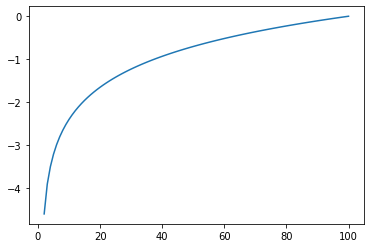

In [ ]:
plt.plot(np.arange(1, 101, 1), np.log(np.arange(0, 1, 0.01)))

Pero, dado que quisiéramos números positivos, podemos volver positivo este número:

In [ ]:
logprob = torch.log(prob)
nlog = -logprob
logprob, nlog

(tensor(-2.6971), tensor(2.6971))

Y la negative log likelihood es la suma de todas las negative logs. Nuestra loss function entonces podría ser la negative log likelihood (`nll`) normalizada para obtener el promedio. Mientras esta loss function sea menor, nuestro modelo será mejor:

In [ ]:
log_likelihood = 0.0
n = 0.0

for p in palabras:
  cs = ['.'] + list(p) + ['.']
  for c1, c2 in zip(cs, cs[1:]):
    ix1 = paf[c1]
    ix2 = paf[c2]
    prob = P[ix1,ix2]
    logprob = torch.log(prob)
    log_likelihood += logprob
    n += 1
    #print(f'{c1}{c2}: {prob} {log_likelihood:.4f}')

nll = -log_likelihood
print(f'{nll}')
print(f'{nll/n}')

375152.34375
2.2672061920166016


In [ ]:
log_likelihood = 0.0
n = 0.0

for bi in ['dante']:
  cs = ['.'] + list(bi) + ['.']
  for c1, c2 in zip(cs, cs[1:]):
    ix1 = paf[c1]
    ix2 = paf[c2]
    prob = P[ix1,ix2]
    logprob = torch.log(prob)
    log_likelihood += logprob
    n += 1
    print(f'{c1}{c2} | prob: {prob:.7f} | log likelihood: {log_likelihood:.4f}')

nll = -log_likelihood
print(f'nll: {nll}')
print(f'loss fn: {nll/n}')

.d | prob: 0.0493446 | log likelihood: -3.0089
da | prob: 0.3054336 | log likelihood: -4.1949
an | prob: 0.1229762 | log likelihood: -6.2907
nt | prob: 0.0515025 | log likelihood: -9.2568
te | prob: 0.1527994 | log likelihood: -11.1355
e. | prob: 0.0674018 | log likelihood: -13.8326
nll: 13.832551956176758
loss fn: 2.3054254055023193


### Red neuronal

Optimizaremos nuestro modelo con una red neuronal:

In [ ]:
# Juntaremos los bigramas para el set de entrenamiento (inputs x, predicciones y)
# Primero un ejemplo:

xs, ys = [], []

for p in palabras[:1]:
  cs = ['.'] + list(p) + ['.']
  for c1, c2 in zip(cs, cs[1:]):
    ix1 = paf[c1]
    ix2 = paf[c2]
    print(c1, c2)
    xs.append(ix1)
    ys.append(ix2)

xs = torch.tensor(xs)
ys = torch.tensor(ys)
xs, ys

. m
m a
a r
r i
i a
a .


(tensor([ 0, 13,  1, 18,  9,  1]), tensor([13,  1, 18,  9,  1,  0]))

In [ ]:
# Ahora todas las palabras

xs, ys = [], []

for p in palabras:
  cs = ['.'] + list(p) + ['.']
  for c1, c2 in zip(cs, cs[1:]):
    ix1 = paf[c1]
    ix2 = paf[c2]
    xs.append(ix1)
    ys.append(ix2)

xs = torch.tensor(xs) # Pasamos cada bigrama a tensores x (inputs), y (predicción deseada)
ys = torch.tensor(ys)
xs

tensor([ 0, 13,  1,  ..., 12, 12,  1])

Para pasar esta información a una red neuronal, primero la codificaremos en vectores vía one-hot encoding:

In [ ]:
import torch.nn.functional as F

# Primero veamos un ejemplo:
xenc = F.one_hot(xs[0:6], num_classes=27).float()
xs[0:6], xenc, xenc.shape

(tensor([ 0, 13,  1, 18,  9,  1]),
 tensor([[1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
          0., 0., 0., 0., 0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.,
          0., 0., 0., 0., 0., 0., 0., 0., 0.],
         [0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
          0., 0., 0., 0., 0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
          1., 0., 0., 0., 0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.,
          0., 0., 0., 0., 0., 0., 0., 0., 0.],
         [0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
          0., 0., 0., 0., 0., 0., 0., 0., 0.]]),
 torch.Size([6, 27]))

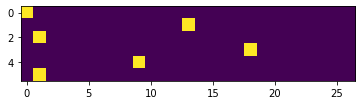

In [ ]:
plt.imshow(xenc)

In [ ]:
xenc = F.one_hot(xs, num_classes=27).float() # Ahora hacemos un one-hot encoding con todos los datos
xenc, xenc.shape

(tensor([[1., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 1., 0.,  ..., 0., 0., 0.],
         ...,
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 1., 0.,  ..., 0., 0., 0.]]), torch.Size([165469, 27]))

In [ ]:
w = torch.randn((27,27), requires_grad=True)
xenc[:6].shape, w.shape
(xenc[:6] @ w)

tensor([[ 1.7375e+00, -1.6226e+00,  1.1169e+00,  5.2440e-01,  1.9235e+00,
          7.7240e-02,  9.0700e-01, -1.4147e-02, -1.3114e+00,  1.8893e+00,
          1.3329e+00,  3.8851e-01,  1.4112e-03, -6.9552e-01,  1.5654e+00,
         -1.1414e+00, -3.3127e-01,  1.6875e+00, -3.0902e-01, -2.8625e-01,
          3.0215e-02, -4.3973e-01,  9.5093e-01, -8.3326e-01,  3.8003e-01,
         -4.0360e-01,  9.7218e-01],
        [-4.0560e-01,  1.1065e-01, -2.0732e-01, -3.5821e-01, -1.7004e+00,
         -4.6233e-02,  4.6964e-01, -4.7488e-01, -1.1909e-01,  7.0113e-01,
          4.0031e-02, -4.9382e-01,  1.1622e+00, -1.3650e+00, -9.1052e-01,
         -2.0342e+00, -1.5120e+00, -4.5619e-01, -2.3238e-01, -1.4177e+00,
          5.8740e-01, -2.1195e+00, -2.9052e-01, -6.9798e-01, -5.4531e-02,
          2.6171e-01, -2.9523e-01],
        [ 1.8342e+00, -4.6852e-01,  1.3385e+00, -1.4190e+00,  5.9264e-01,
         -1.0697e+00, -3.2573e-01,  4.0733e-01, -2.4890e-01,  1.7361e+00,
          2.8319e-03, -2.0055e+00,  4.27

In [ ]:
xenc[0]

tensor([1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [ ]:
w[:,1]

tensor([-1.6226, -0.4685,  0.2680,  1.0141, -0.2838,  0.2251,  0.6496, -1.0305,
        -1.0217, -1.0225,  0.5276, -1.1557,  1.2544,  0.1107, -0.2494,  0.3028,
         1.3921, -1.9678, -1.1675, -0.2656,  0.7018,  2.0679,  1.9240, -0.7715,
         0.0897,  1.8722,  1.2221], grad_fn=<SelectBackward0>)

In [ ]:
(xenc[0] * w[:,1])

tensor([-1.6226, -0.0000,  0.0000,  0.0000, -0.0000,  0.0000,  0.0000, -0.0000,
        -0.0000, -0.0000,  0.0000, -0.0000,  0.0000,  0.0000, -0.0000,  0.0000,
         0.0000, -0.0000, -0.0000, -0.0000,  0.0000,  0.0000,  0.0000, -0.0000,
         0.0000,  0.0000,  0.0000], grad_fn=<MulBackward0>)

In [ ]:
(xenc[:6] @ w)[0,1]

tensor(-1.6226, grad_fn=<SelectBackward0>)

In [ ]:
(xenc[0] * w[:,1]).sum()

tensor(-1.6226, grad_fn=<SumBackward0>)

In [ ]:
#FORWARD PASS

W = torch.randn((27, 27), requires_grad=True) # Creamos weights aleatorios
logits = xenc @ W #multiplicamos valores de x por w para obtener log-counts
counts = logits.exp() # exponenciamos para obtener valores mayores a 0, equivalentes a matriz N
probs = counts / counts.sum(1, keepdims=True) # normalizar los counts para obtener probabilidades
probs # los últimos dos pasos son equivalentes a la función softmax
logits.shape 

torch.Size([165469, 27])

In [ ]:
probs.shape

torch.Size([165469, 27])

In [ ]:
probs[0]

tensor([0.0146, 0.0240, 0.0170, 0.0048, 0.0505, 0.0098, 0.1241, 0.0519, 0.0512,
        0.0357, 0.0390, 0.0099, 0.0302, 0.0544, 0.0401, 0.0584, 0.0268, 0.0211,
        0.0679, 0.0421, 0.0178, 0.0231, 0.0844, 0.0066, 0.0394, 0.0392, 0.0163],
       grad_fn=<SelectBackward0>)

In [ ]:
nlls = torch.zeros(6)
for i in range(6):
  x = xs[i].item()
  y = ys[i].item()
  print('------')
  print(f'bigrama ejemplo {i+1}: {fap[x]}{fap[y]}, índices {x},{y}')
  print(f'input: {x}')
  print(f'probabilidad del output, calculado por la red neuronal: {probs[i]}')
  print(f'output correcto: {y}')
  p = probs[i, y]
  print(f'probabilidad asignada por la red al caracter correcto: {p.item()}')
  logp = torch.log(p)
  print('log likelihood', logp.item())
  nll = -logp
  print('negative log likelihood:', nll.item())
  nlls[i] = nll

print('-----')
print(f'promedio de la nll, i. e. loss = {nlls.mean().item()}')

------
bigrama ejemplo 1: .m, índices 0,13
input: 0
probabilidad del output, calculado por la red neuronal: tensor([0.0146, 0.0240, 0.0170, 0.0048, 0.0505, 0.0098, 0.1241, 0.0519, 0.0512,
        0.0357, 0.0390, 0.0099, 0.0302, 0.0544, 0.0401, 0.0584, 0.0268, 0.0211,
        0.0679, 0.0421, 0.0178, 0.0231, 0.0844, 0.0066, 0.0394, 0.0392, 0.0163],
       grad_fn=<SelectBackward0>)
output correcto: 13
probabilidad asignada por la red al caracter correcto: 0.054369036108255386
log likelihood -2.9119603633880615
negative log likelihood: 2.9119603633880615
------
bigrama ejemplo 2: ma, índices 13,1
input: 13
probabilidad del output, calculado por la red neuronal: tensor([0.0190, 0.0084, 0.0094, 0.0123, 0.0760, 0.0291, 0.0261, 0.0591, 0.0548,
        0.0536, 0.0354, 0.0165, 0.0473, 0.0186, 0.0016, 0.0602, 0.0484, 0.2626,
        0.0251, 0.0171, 0.0043, 0.0247, 0.0068, 0.0103, 0.0107, 0.0571, 0.0055],
       grad_fn=<SelectBackward0>)
output correcto: 1
probabilidad asignada por la red al car

In [ ]:
xs

tensor([ 0, 13,  1,  ..., 12, 12,  1])

In [ ]:
ys

tensor([13,  1, 18,  ..., 12,  1,  0])

In [ ]:
probs[0,13], probs[1,1], probs[2,18], probs[3,9], probs[4,1], probs[5,0]

(tensor(0.0544, grad_fn=<SelectBackward0>),
 tensor(0.0084, grad_fn=<SelectBackward0>),
 tensor(0.0064, grad_fn=<SelectBackward0>),
 tensor(0.0194, grad_fn=<SelectBackward0>),
 tensor(0.0070, grad_fn=<SelectBackward0>),
 tensor(0.0105, grad_fn=<SelectBackward0>))

In [ ]:
(W**2).sum()

tensor(702.6670, grad_fn=<SumBackward0>)

In [ ]:
# AHORA TODO JUNTO:

num = xs.nelement()

# FORWARD PASS
for i in range(10):
  xenc = F.one_hot(xs, num_classes=27).float() # Ahora hacemos un one-hot encoding
  logits = xenc @ W #multiplicamos valores de x por w para obtener log-counts
  counts = logits.exp() # exponenciamos para obtener valores mayores a 0, equivalentes a matriz N
  probs = counts / counts.sum(1, keepdims=True) # normalizar los counts para obtener probabilidades
  probs # los últimos dos pasos son equivalentes a la función softmax
  loss = -probs[torch.arange(num), ys].log().mean() + 0.01*(W**2).mean()
  
  # BACKWARD PASS
  W.grad = None
  loss.backward()
  print(loss.item())

  # UPDATE
  W.data += -50 * W.grad

2.4221291542053223
2.337578296661377
2.320709705352783
2.315040111541748
2.3112778663635254
2.3103187084198
2.3092570304870605
2.308797836303711
2.3081626892089844
2.307844877243042


In [ ]:
for i in range(5):
  out = []
  ix = 0
  while True:
    xenc = F.one_hot(torch.tensor([ix]), num_classes=27).float()
    logits = xenc @ W
    counts = logits.exp()
    p = counts / counts.sum(1, keepdims=True).item()

    ix = torch.multinomial(p, num_samples=1, replacement=True).item()
    out.append(fap[ix])

    if ix == 0:
      break

  print(''.join(out))

celdino.
a.
sminoferiludaderta.
cis.
vada.
